In [15]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [16]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    TFTT,
    TTFT,
    GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    # Davis,
    # Downing,
    # Feld,
    # Grofman,
    # Grudger,
    # Joss,
    # Nydegger,
    # Shubik,
    # SteinAndRapoport,
    # TidemanAndChieruzzi,
    # Tullock,
])

In [17]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 100)
        self.layer2 = nn.Linear(100, 100)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(100, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 8
    epsilon = 0.2

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.01
        self._discount_rate = 0.9
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [18]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=200,
    noise=0,
    repetitions=1,
    epochs=100,
)

[04:35:04] Commencement of training.
[04:35:06] Completed epoch 1: 2.470252235827211
[04:35:09] Completed epoch 2: 2.457233794896485
[04:35:12] Completed epoch 3: 2.4601558632643235
[04:35:14] Completed epoch 4: 2.4607418974482425
[04:35:16] Completed epoch 5: 2.455493517958594
[04:35:18] Completed epoch 6: 2.457161264965495
[04:35:21] Completed epoch 7: 2.4554953699704245
[04:35:23] Completed epoch 8: 2.4553084487241215
[04:35:26] Completed epoch 9: 2.4538852877547743
[04:35:29] Completed epoch 10: 2.454096758979297
[04:35:31] Completed epoch 11: 2.4564515990720883
[04:35:33] Completed epoch 12: 2.4528306324827476
[04:35:36] Completed epoch 13: 2.4564205838302287
[04:35:39] Completed epoch 14: 2.4588905421280693
[04:35:41] Completed epoch 15: 2.459164505986198
[04:35:44] Completed epoch 16: 2.4605917243620605
[04:35:46] Completed epoch 17: 2.4604980935172334
[04:35:49] Completed epoch 18: 2.4590537549884983
[04:35:52] Completed epoch 19: 2.4589719784101565
[04:35:54] Completed epoch 2

In [19]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 89947, <Action.DEFECT: 1>: 10053}
{<Action.COOPERATE: 0>: 0.89947, <Action.DEFECT: 1>: 0.10053}


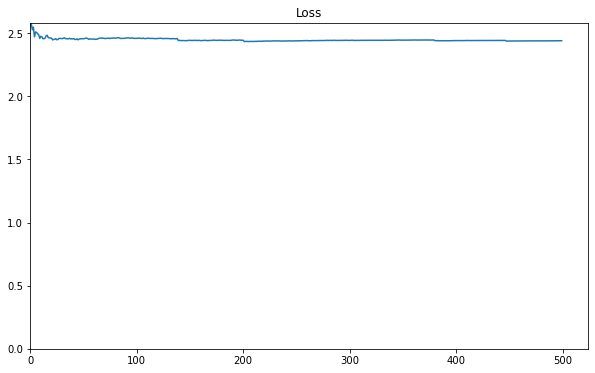

In [20]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

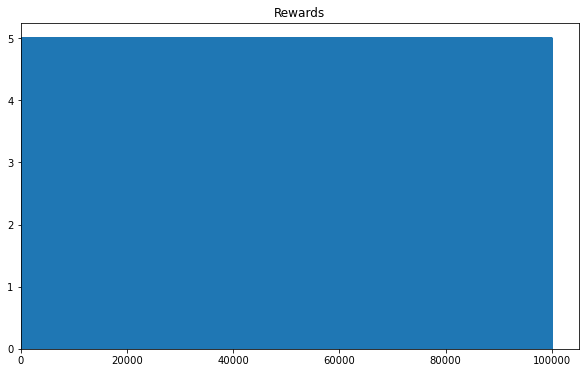

In [21]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

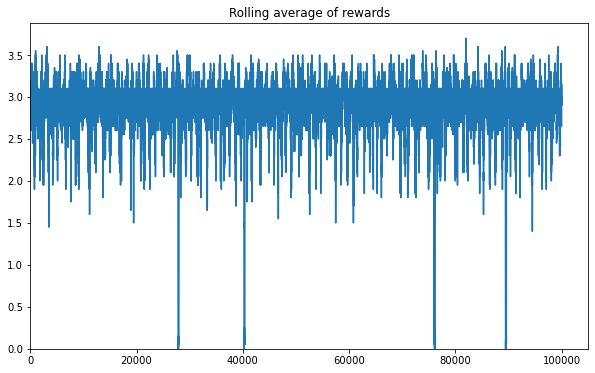

In [22]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

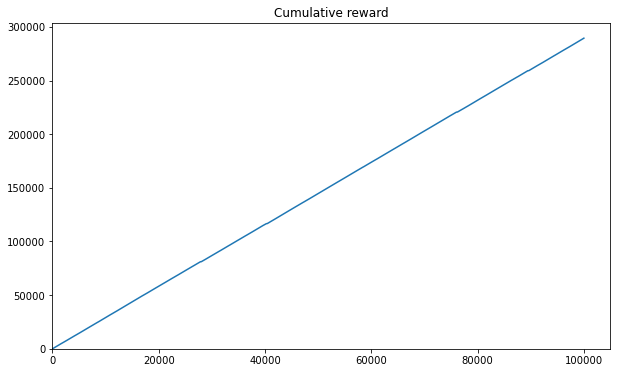

In [23]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

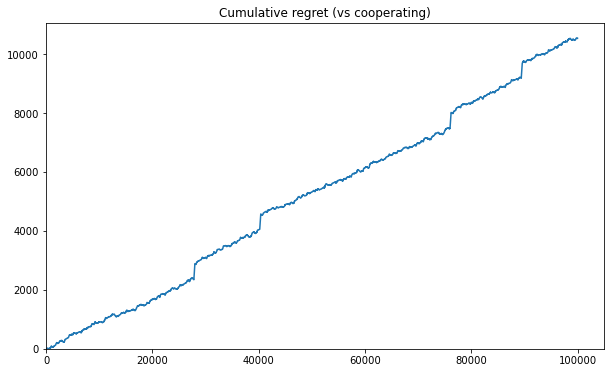

In [24]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.91, <Action.DEFECT: 1>: 0.09}, {<Action.COOPERATE: 0>: 0.876, <Action.DEFECT: 1>: 0.124}, {<Action.COOPERATE: 0>: 0.901, <Action.DEFECT: 1>: 0.099}, {<Action.COOPERATE: 0>: 0.889, <Action.DEFECT: 1>: 0.111}, {<Action.COOPERATE: 0>: 0.897, <Action.DEFECT: 1>: 0.103}, {<Action.COOPERATE: 0>: 0.907, <Action.DEFECT: 1>: 0.093}, {<Action.COOPERATE: 0>: 0.903, <Action.DEFECT: 1>: 0.097}, {<Action.COOPERATE: 0>: 0.912, <Action.DEFECT: 1>: 0.088}, {<Action.COOPERATE: 0>: 0.907, <Action.DEFECT: 1>: 0.093}, {<Action.COOPERATE: 0>: 0.892, <Action.DEFECT: 1>: 0.108}, {<Action.COOPERATE: 0>: 0.922, <Action.DEFECT: 1>: 0.078}, {<Action.COOPERATE: 0>: 0.895, <Action.DEFECT: 1>: 0.105}, {<Action.COOPERATE: 0>: 0.902, <Action.DEFECT: 1>: 0.098}, {<Action.COOPERATE: 0>: 0.91, <Action.DEFECT: 1>: 0.09}, {<Action.COOPERATE: 0>: 0.899, <Action.DEFECT: 1>: 0.101}, {<Action.COOPERATE: 0>: 0.901, <Action.DEFECT: 1>: 0.099}, {<Action.COOPERATE: 0>: 0.913, <Action.DEFECT: 1>: 0.087}, 

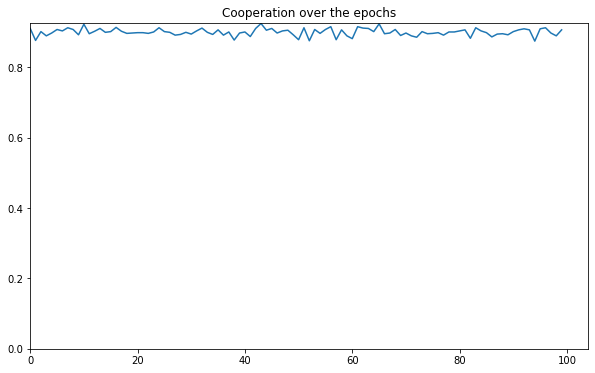

In [25]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [26]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [27]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)

In [28]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:11<00:00, 13.37matches/s] 

SecondByWeiner                 836                  19.21847            
Shubik                         824                  6.902790999999998   
TTFT                           819                  6.695860000000003   
GradualTFT                     803                  53.294406           
Pavlov                         800                  6.637228999999999   
SecondByGraaskampKatzen        796                  7.111878999999999   
Leyvraz                        792                  32.46079            
Grofman                        790                  6.362908            
TFTT                           785                  5.885408000000001   
TidemanAndChieruzzi            785                  7.371567000000001   
SecondByBlackK83R              778                  8.197695999999999   
Davis                          774                  9.687898            
AllC                           771                  6.684086000000001   
SteinAndRapoport               769                 